In [ ]:
#Import File Bengkel.xslx
from google.colab import files
upload = files.upload()
#Siapkan bengkel.xslx
#Running dan Upload

Saving bengkel(1).xlsx to bengkel(1).xlsx


In [ ]:
#Membaca Data File Excel
import pandas as pd
import io
# Ubahlah ['bengkel(1).xlsx'] sesuai dengan nama file yang digunakan
df = pd.read_excel(io.BytesIO(upload['bengkel(1).xlsx']))
df

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


In [ ]:
  #Define Data
  id = df['id']
  servis = df['servis']
  harga = df['harga']

In [ ]:
cripsValue = []

for x in range(100):
  nilaiServis = {'sangatburuk' : 0, 'buruk' : 0,'baik' : 0,'sangatbaik' : 0}
  a,b,c,d,e,f = 30, 35, 60, 65, 75, 80
  #Fuzzification
  #Servis
  if servis[x] <= a:
      nilaiServis['sangatburuk'] = 1
  elif b <= servis[x] <= c:
      nilaiServis['buruk'] = 1
  elif d <= servis[x] <= e:
      nilaiServis['baik'] = 1
  elif servis[x] >= f:
      nilaiServis['sangatbaik'] = 1
 
  if a < servis[x] < b:
      nilaiServis['sangatburuk'] = -(servis[x] - b) / (b - a)
      nilaiServis['buruk'] = (servis[x] - a) / (b - a)
  elif c < servis[x] < d:
      nilaiServis['buruk'] = -(servis[x] - d) / (d - c)
      nilaiServis['baik'] = (servis[x] - c) / (d - c)
  elif e < servis[x] < f:
      nilaiServis['baik'] = -(servis[x] - f) / (f - e)
      nilaiServis['sangatbaik'] = (servis[x] - e) / (f - e)


  nilaiHarga = {'sangatmurah' : 0,'murah' : 0,'mahal' : 0,'sangatmahal' : 0 }
  a,b,c,d,e,f = 3, 4, 6, 7, 8, 9
  #Fuzzification
  #Harga
  if harga[x] <= a:
    nilaiHarga['sangatmurah'] = 1
  elif harga[x] >= b and harga[x] <= c:
    nilaiHarga['murah'] = 1
  elif harga[x] >= d and harga[x] <= e:
    nilaiHarga['mahal'] = 1
  elif harga[x] >= f:
    nilaiHarga['sangatmahal'] = 1

  if a < harga[x] < b:
      nilaiHarga['sangatmurah'] = -(harga[x] - b) / (b - a)
      nilaiHarga['murah'] = (harga[x] - a) / (b - a)
  elif c < harga[x] < d:
      nilaiHarga['murah'] = -(harga[x] - d) / (d - c)
      nilaiHarga['mahal'] = (harga[x] - c) / (d - c)
  elif e < harga[x] < f:
      nilaiHarga['mahal'] = -(harga[x] - f) / (f - e)
      nilaiHarga['sangatmahal'] = (harga[x] - e) / (f - e)
  
  # Test hasil Fungsi Keanggotaan
  
  print('='*40)
  print(nilaiHarga)
  print(nilaiServis)

  #inference
  TR = [] #Tidak Rekomendasi
  #if nilaiHarga['sangatmurah'] and nilaiServis['sangatburuk']:
  TR.append(min(nilaiHarga['sangatmurah'],nilaiServis['sangatburuk']))
  #if nilaiHarga['murah'] and nilaiServis['sangatburuk']:
  TR.append(min(nilaiHarga['murah'],nilaiServis['sangatburuk']))
  #if nilaiHarga['mahal'] and nilaiServis['sangatburuk']:
  TR.append(min(nilaiHarga['mahal'],nilaiServis['sangatburuk']))
  #if nilaiHarga['sangatmahal'] and nilaiServis['sangatburuk']:
  TR.append(min(nilaiHarga['sangatmahal'],nilaiServis['sangatburuk']))
  #if nilaiHarga['sangatmahal'] and nilaiServis['buruk']:
  TR.append(min(nilaiHarga['sangatmahal'],nilaiServis['buruk']))
  #if nilaiHarga['mahal'] and nilaiServis['buruk']:
  TR.append(min(nilaiHarga['mahal'],nilaiServis['buruk']))
  #if nilaiHarga['murah'] and nilaiServis['buruk']:
  TR.append(min(nilaiHarga['murah'],nilaiServis['buruk']))
  #if nilaiHarga['sangatmurah'] and nilaiServis['buruk']:
  TR.append(min(nilaiHarga['sangatmurah'],nilaiServis['buruk']))
  
  
  if TR != []:
    maxTR = max(TR)
  print('Tidak Rekomendasi    :',maxTR)

  R = [] #Rekomendasi
  #if nilaiHarga['sangatmahal'] and nilaiServis['baik']:
  R.append(min(nilaiHarga['sangatmahal'],nilaiServis['baik']))
  #if nilaiHarga['mahal'] and nilaiServis['baik']:
  R.append(min(nilaiHarga['mahal'],nilaiServis['baik']))
  
  if R != []:
    maxR = max(R)
  print('Rekomendasi          :',maxR)
  
  SR = [] #Sangat Rekomendasi
  #if nilaiHarga['sangatmurah'] and nilaiServis['baik']:
  SR.append(min(nilaiHarga['sangatmurah'],nilaiServis['baik']))
  #if nilaiHarga['murah'] and nilaiServis['baik']:
  SR.append(min(nilaiHarga['murah'],nilaiServis['baik']))
  #if nilaiHarga['sangatmurah'] and nilaiServis['sangatbaik']:
  SR.append(min(nilaiHarga['sangatmurah'],nilaiServis['sangatbaik']))
  #if nilaiHarga['murah'] and nilaiServis['sangatbaik']:
  SR.append(min(nilaiHarga['murah'],nilaiServis['sangatbaik']))
  #if nilaiHarga['mahal'] and nilaiServis['sangatbaik']:
  SR.append(min(nilaiHarga['mahal'],nilaiServis['sangatbaik']))
  #if nilaiHarga['sangatmahal'] and nilaiServis['sangatbaik']:
  SR.append(min(nilaiHarga['sangatmahal'],nilaiServis['sangatbaik']))
  
  if SR != []:
    maxSR = max(SR)
  print('Sangat Rekomendasi   :',maxSR)
  
  #Deffuzyfication
  
  pembagi = maxR + maxSR + maxTR
  result = ((30*maxTR)+(75*maxR)+(100*maxSR)) / pembagi
  cripsValue.append(result)
  print('id   Servis  Harga  Hasil')
  print(id[x],' ',servis[x],'    ',harga[x],'    ',result)
  print('='*40)


{'sangatmurah': 0, 'murah': 0, 'mahal': 1, 'sangatmahal': 0}
{'sangatburuk': 0, 'buruk': 1, 'baik': 0, 'sangatbaik': 0}
Tidak Rekomendasi    : 1
Rekomendasi          : 0
Sangat Rekomendasi   : 0
id   Servis  Harga  Hasil
1   58      7      30.0
{'sangatmurah': 1, 'murah': 0, 'mahal': 0, 'sangatmahal': 0}
{'sangatburuk': 0, 'buruk': 1, 'baik': 0, 'sangatbaik': 0}
Tidak Rekomendasi    : 1
Rekomendasi          : 0
Sangat Rekomendasi   : 0
id   Servis  Harga  Hasil
2   54      1      30.0
{'sangatmurah': 1, 'murah': 0, 'mahal': 0, 'sangatmahal': 0}
{'sangatburuk': 0, 'buruk': 0, 'baik': 0, 'sangatbaik': 1}
Tidak Rekomendasi    : 0
Rekomendasi          : 0
Sangat Rekomendasi   : 1
id   Servis  Harga  Hasil
3   98      2      100.0
{'sangatmurah': 0, 'murah': 1, 'mahal': 0, 'sangatmahal': 0}
{'sangatburuk': 0, 'buruk': 1, 'baik': 0, 'sangatbaik': 0}
Tidak Rekomendasi    : 1
Rekomendasi          : 0
Sangat Rekomendasi   : 0
id   Servis  Harga  Hasil
4   52      4      30.0
{'sangatmurah': 0, 

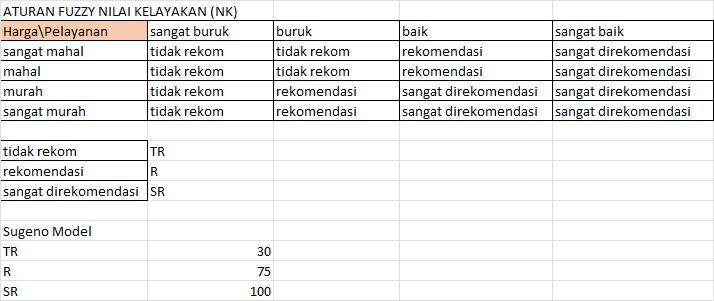

In [ ]:
#Input data to dataframe
df['Kelayakan'] = cripsValue
df.sort_values(by='Kelayakan', ascending=False,).head(10)

,id,servis,harga,Kelayakan
59,60,79,6,100.0
91,92,83,3,100.0
68,69,86,10,100.0
23,24,100,9,100.0
41,42,94,10,100.0
78,79,87,9,100.0
16,17,70,3,100.0
15,16,82,6,100.0
90,91,98,3,100.0
12,13,80,3,100.0


In [ ]:
# Export hasil modelling fuzzy
df.to_excel('FuzzyLogic_18.xlsx')
files.download('FuzzyLogic_18.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>